<a href="https://colab.research.google.com/github/anushkadutt2711/ML/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for encoding
from sklearn.preprocessing import LabelEncoder

#for train test splitting
from sklearn.model_selection import train_test_split

#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_excel("data_excel.xlsx")
df.head()

,COMPANY,JOB,DEGREE,SALARY_MORE_THAN_100k
0,Google,Sales Executive,Bachelors,0
1,Google,Sales Executive,Masters,1
2,Google,Business manager,Masters,1
3,Google,Business manager,Bachelors,0
4,Google,Computer Programmer,Masters,1


In [4]:
inputs = df.drop('SALARY_MORE_THAN_100k' , axis = 'columns')
target = df['SALARY_MORE_THAN_100k']

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['COMPANY_n'] = le_company.fit_transform(inputs['COMPANY'])
inputs['JOB_n'] = le_company.fit_transform(inputs['JOB'])
inputs['DEGREE_n'] = le_company.fit_transform(inputs['DEGREE'])
inputs.head()

,COMPANY,JOB,DEGREE,COMPANY_n,JOB_n,DEGREE_n
0,Google,Sales Executive,Bachelors,2,2,0
1,Google,Sales Executive,Masters,2,2,1
2,Google,Business manager,Masters,2,0,1
3,Google,Business manager,Bachelors,2,0,0
4,Google,Computer Programmer,Masters,2,1,1


In [9]:
inputs_n = inputs.drop(['COMPANY','JOB','DEGREE'] , axis = 'columns')
inputs_n

,COMPANY_n,JOB_n,DEGREE_n
0,2,2,0
1,2,2,1
2,2,0,1
3,2,0,0
4,2,1,1
5,2,1,0
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n , target, test_size = 0.2, random_state = 42)

In [10]:
from sklearn import tree

In [11]:
model = tree.DecisionTreeClassifier()

In [12]:
model.fit(inputs_n , target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
# Predicting the values of test data
y_pred = model.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



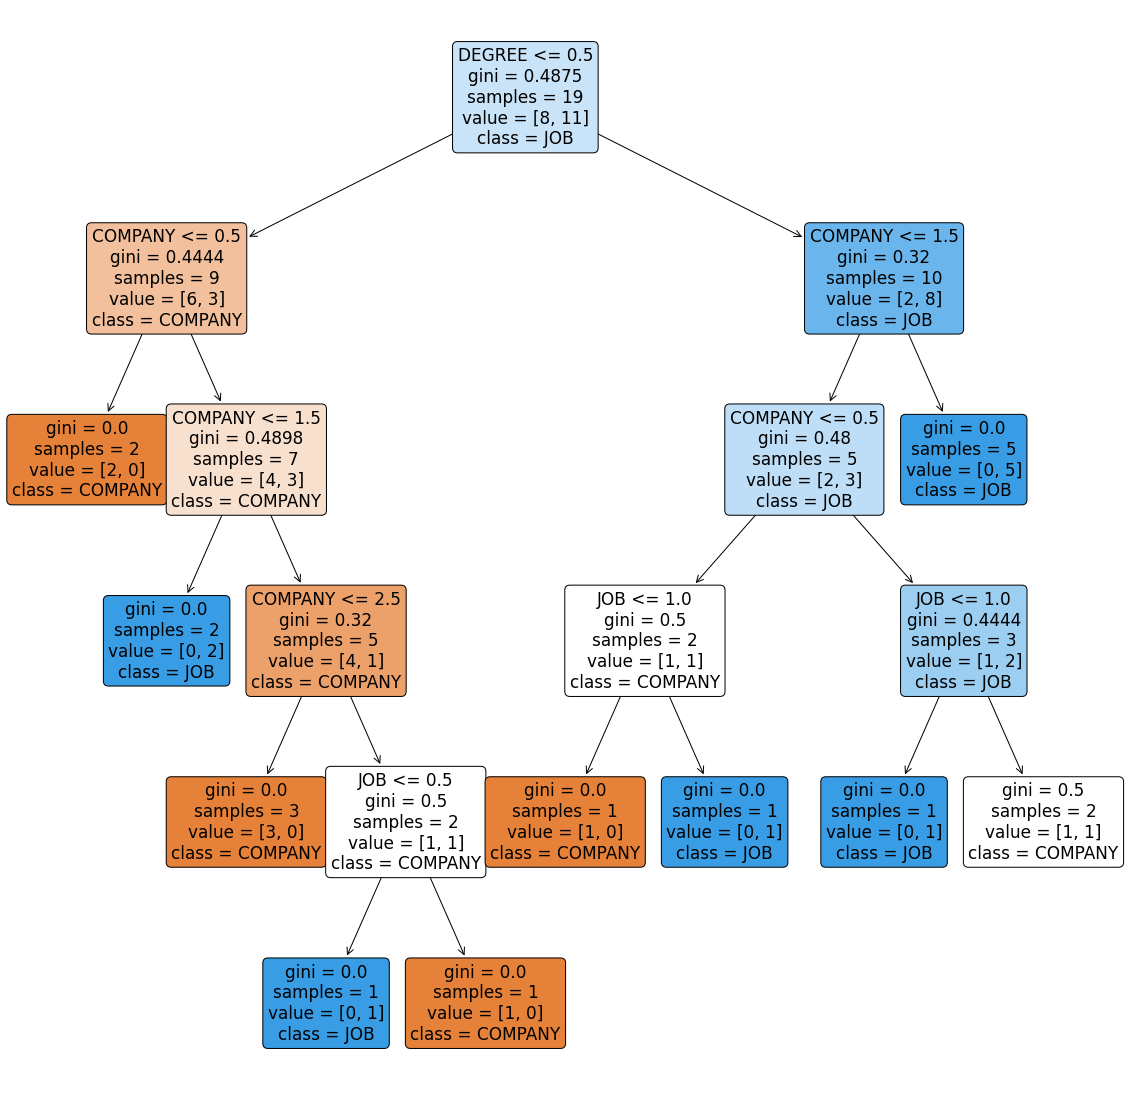

In [20]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=model, feature_names = inputs.columns, 
                     class_names =["COMPANY", "JOB", "DEGREE"] , filled = True , precision = 4, rounded = True)

plt.savefig("one.png")